# Data Explorations

https://www.reneshbedre.com/blog/anova.html

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
plant_data = pd.read_csv('dataset/PlantGrowth.csv')

print('Shape', plant_data.shape)
plant_data.head(10)

Shape (30, 3)


,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


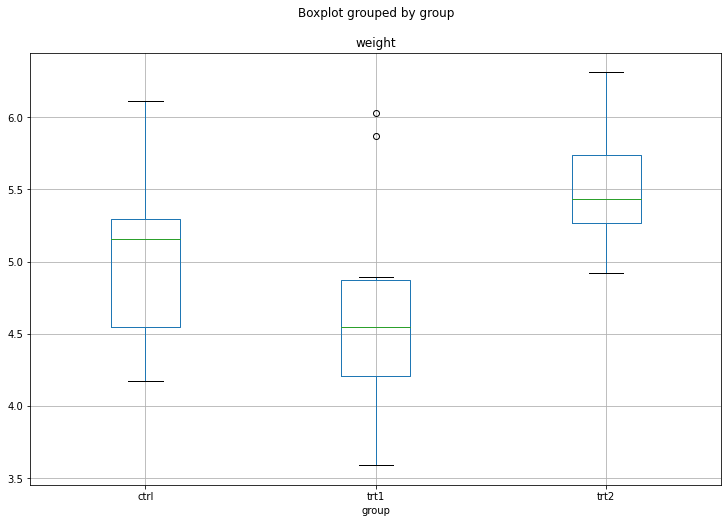

In [62]:
plant_data.boxplot('weight', by='group', figsize=(12,8))
plt.show()

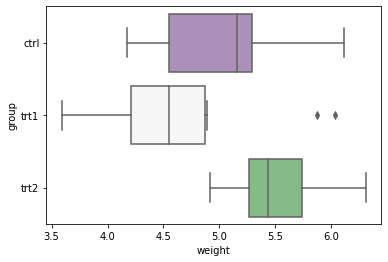

In [63]:
sns.boxplot(x="weight", y="group", data=plant_data, palette="PRGn")
plt.show()

In [64]:
ctrl = plant_data['weight'][plant_data.group == 'ctrl']
ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [65]:
grps = pd.unique(plant_data.group.values)
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [66]:
d_data = {grp:plant_data['weight'][plant_data.group == grp] for grp in grps}
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [67]:
len(pd.unique(plant_data.group))

3

In [68]:
len(plant_data.values)

30

In [69]:
plant_data.groupby('group').size()

group
ctrl    10
trt1    10
trt2    10
dtype: int64

## ANOVA Test

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('weight ~ C(group)', data=plant_data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df         F   PR(>F)
C(group)   3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


## Tukey's Test

In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(plant_data['weight'], plant_data['group'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------
['ctrl' 'trt1' 'trt2']
